In [13]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [14]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# <font color = blue> IMDb Movie Assignment </font>

You have the data for the 100 top-rated movies from the past decade along with various pieces of information about the movie, its actors, and the voters who have rated these movies online. In this assignment, you will try to find some interesting insights into these movies and their voters, using Python.

##  Task 1: Reading the data

- ### Subtask 1.1: Read the Movies Data.

Read the movies data file provided and store it in a dataframe `movies`.

In [15]:
# Read the csv file using 'read_csv'. Please write your dataset location here.
df = pd.read_csv('Movie+Assignment+Data.csv')
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
0,La La Land,2016,30000000,151101803,Ryan Gosling,Emma Stone,Amiée Conn,14000,19000.0,NaN,...,7.9,7.8,7.6,7.6,7.5,7.1,8.3,8.1,PG-13,USA
1,Zootopia,2016,150000000,341268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
2,Lion,2016,12000000,51738905,Dev Patel,Nicole Kidman,Rooney Mara,33000,96000.0,9800.0,...,7.9,8.2,8.0,7.9,8.4,7.1,8.1,8.0,PG-13,Australia
3,Arrival,2016,47000000,100546139,Amy Adams,Jeremy Renner,Forest Whitaker,35000,5300.0,NaN,...,7.8,7.8,7.6,7.6,7.7,7.3,8.0,7.9,PG-13,USA
4,Manchester by the Sea,2016,9000000,47695371,Casey Affleck,Michelle Williams,Kyle Chandler,518,71000.0,3300.0,...,7.7,7.7,7.6,7.6,7.6,7.1,7.9,7.8,R,USA


- ###  Subtask 1.2: Inspect the Dataframe

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [16]:
# Check the number of rows and columns in the dataframe
df.shape

(100, 62)

In [17]:
# Check the column-wise info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

### The columns of actor_2_facebook_likes,actor_3_facebook_likes,genre_2 ,genre_3,MetaCritic contains NULL values.

In [18]:
# Check the summary for the numeric columns 
df.describe()

,title_year,budget,Gross,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,MetaCritic,Runtime,CVotes10,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
count,100.000000,1.000000e+02,1.000000e+02,100.000000,99.000000,98.000000,100.000000,95.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2012.820000,7.838400e+07,1.468679e+08,13407.270000,7377.303030,3002.153061,7.883000,78.252632,126.420000,73212.160000,...,7.982000,7.732000,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000
std,1.919491,7.445295e+07,1.454004e+08,10649.037862,13471.568216,6940.301133,0.247433,9.122066,19.050799,82669.594746,...,0.321417,0.251814,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099
min,2010.000000,3.000000e+06,2.238380e+05,39.000000,12.000000,0.000000,7.500000,62.000000,91.000000,6420.000000,...,7.300000,7.300000,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000
25%,2011.000000,1.575000e+07,4.199752e+07,1000.000000,580.000000,319.750000,7.700000,72.000000,114.750000,30587.000000,...,7.700000,7.600000,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000
50%,2013.000000,4.225000e+07,1.070266e+08,13000.000000,1000.000000,626.500000,7.800000,78.000000,124.000000,54900.500000,...,8.000000,7.700000,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000
75%,2014.000000,1.500000e+08,2.107548e+08,20000.000000,11000.000000,1000.000000,8.100000,83.500000,136.250000,80639.000000,...,8.200000,7.900000,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000
max,2016.000000,2.600000e+08,9.366622e+08,35000.000000,96000.000000,46000.000000,8.800000,100.000000,180.000000,584839.000000,...,8.800000,8.700000,8.700000,8.500000,8.10000,8.100000,8.500000,8.200000,8.700000,8.800000


## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round-off the percentages upto two decimal places.

In [19]:
# Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function

df.isnull().any()

Title             False
title_year        False
budget            False
Gross             False
actor_1_name      False
                  ...  
Votes1000         False
VotesUS           False
VotesnUS          False
content_rating    False
Country           False
Length: 62, dtype: bool

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   100 non-null    object 
 1   title_year              100 non-null    int64  
 2   budget                  100 non-null    int64  
 3   Gross                   100 non-null    int64  
 4   actor_1_name            100 non-null    object 
 5   actor_2_name            100 non-null    object 
 6   actor_3_name            100 non-null    object 
 7   actor_1_facebook_likes  100 non-null    int64  
 8   actor_2_facebook_likes  99 non-null     float64
 9   actor_3_facebook_likes  98 non-null     float64
 10  IMDb_rating             100 non-null    float64
 11  genre_1                 100 non-null    object 
 12  genre_2                 97 non-null     object 
 13  genre_3                 74 non-null     object 
 14  MetaCritic              95 non-null     flo

In [21]:
df[df['actor_2_facebook_likes'].isnull()]
df.drop(6, inplace = True)

In [22]:
df[df['actor_3_facebook_likes'].isnull()]
df.drop(3, inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 99
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   98 non-null     object 
 1   title_year              98 non-null     int64  
 2   budget                  98 non-null     int64  
 3   Gross                   98 non-null     int64  
 4   actor_1_name            98 non-null     object 
 5   actor_2_name            98 non-null     object 
 6   actor_3_name            98 non-null     object 
 7   actor_1_facebook_likes  98 non-null     int64  
 8   actor_2_facebook_likes  98 non-null     float64
 9   actor_3_facebook_likes  97 non-null     float64
 10  IMDb_rating             98 non-null     float64
 11  genre_1                 98 non-null     object 
 12  genre_2                 95 non-null     object 
 13  genre_3                 72 non-null     object 
 14  MetaCritic              93 non-null     floa

In [24]:
#### Subtask 2.2: Drop unecessary rows using columns with high NaN percentages
#### df = df[~np.isnan(movies['budget'])]
     df

IndentationError: unexpected indent (<ipython-input-24-bdf7c22cf66c>, line 3)

In [25]:
#Drop all the rows which have Null values for such columns.

df.dropna(axis=0,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 1 to 98
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   68 non-null     object 
 1   title_year              68 non-null     int64  
 2   budget                  68 non-null     int64  
 3   Gross                   68 non-null     int64  
 4   actor_1_name            68 non-null     object 
 5   actor_2_name            68 non-null     object 
 6   actor_3_name            68 non-null     object 
 7   actor_1_facebook_likes  68 non-null     int64  
 8   actor_2_facebook_likes  68 non-null     float64
 9   actor_3_facebook_likes  68 non-null     float64
 10  IMDb_rating             68 non-null     float64
 11  genre_1                 68 non-null     object 
 12  genre_2                 68 non-null     object 
 13  genre_3                 68 non-null     object 
 14  MetaCritic              68 non-null     floa

In [26]:
# Get the percentages by dividing the sum obtained previously by the total length, multiplying it by 100 and rounding it off to
# two decimal places
df.isnull().sum()
df.isnull().sum(axis=1)
round(100*(df.isnull().sum()/len(df.index)), 2)

Title             0.0
title_year        0.0
budget            0.0
Gross             0.0
actor_1_name      0.0
                 ... 
Votes1000         0.0
VotesUS           0.0
VotesnUS          0.0
content_rating    0.0
Country           0.0
Length: 62, dtype: float64

## Task 3: Data Analysis

Now that we have loaded the dataset and inspected it, we see that most of the data is in place. As of now, no data cleaning is required, so let's start with some data manipulation, analysis, and visualisation to get various insights about the data. 

-  ###  Subtask 3.1: Reduce those Digits!

These numbers in the `budget` and `gross` are too big, compromising its readability. Let's convert the unit of the `budget` and `gross` columns from `$` to `million $` first.

In [27]:
df.columns

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country'],
      dtype='object')

In [28]:
# Divide the 'gross' and 'budget' columns by 1000000 to convert '$' to 'million $'

df['Gross'] = df['Gross']/1000000
df['budget'] = df['budget']/1000000
df

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA
5,Hell or High Water,2016,12.0,27.007844,Chris Pine,Jeff Bridges,Ben Foster,19000,12000.0,9000.0,...,7.6,7.4,7.6,7.6,7.7,7.3,7.9,7.5,R,USA
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,7.5,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA
9,Captain America: Civil War,2016,250.0,407.197282,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000.0,11000.0,...,7.7,7.8,7.6,7.6,7.9,7.5,8.1,7.7,PG-13,USA
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Nightcrawler,2014,8.5,32.279955,Jake Gyllenhaal,Michael Papajohn,James Huang,15000,241.0,85.0,...,7.7,7.5,7.7,7.7,7.7,7.8,8.0,7.8,R,USA
91,50/50,2011,8.0,34.963967,Joseph Gordon-Levitt,Anna Kendrick,Bryce Dallas Howard,23000,10000.0,3000.0,...,7.6,7.6,7.4,7.4,7.5,7.0,7.9,7.6,R,USA
92,End of Watch,2012,7.0,40.983001,Jake Gyllenhaal,Anna Kendrick,America Ferrera,15000,10000.0,953.0,...,7.5,7.5,7.4,7.4,7.5,6.5,7.7,7.6,R,USA
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA


-  ###  Subtask 3.2: Let's Talk Profit!

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`.
    4. Plot a scatter or a joint plot between the columns `budget` and `profit` and write a few words on what you observed.
    5. Extract the movies with a negative profit and store them in a new dataframe - `neg_profit`

In [29]:
df['profit']= df['Gross']-df['budget']
df

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
5,Hell or High Water,2016,12.0,27.007844,Chris Pine,Jeff Bridges,Ben Foster,19000,12000.0,9000.0,...,7.4,7.6,7.6,7.7,7.3,7.9,7.5,R,USA,15.007844
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
9,Captain America: Civil War,2016,250.0,407.197282,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000.0,11000.0,...,7.8,7.6,7.6,7.9,7.5,8.1,7.7,PG-13,USA,157.197282
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Nightcrawler,2014,8.5,32.279955,Jake Gyllenhaal,Michael Papajohn,James Huang,15000,241.0,85.0,...,7.5,7.7,7.7,7.7,7.8,8.0,7.8,R,USA,23.779955
91,50/50,2011,8.0,34.963967,Joseph Gordon-Levitt,Anna Kendrick,Bryce Dallas Howard,23000,10000.0,3000.0,...,7.6,7.4,7.4,7.5,7.0,7.9,7.6,R,USA,26.963967
92,End of Watch,2012,7.0,40.983001,Jake Gyllenhaal,Anna Kendrick,America Ferrera,15000,10000.0,953.0,...,7.5,7.4,7.4,7.5,6.5,7.7,7.6,R,USA,33.983001
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225


In [30]:
df = df.sort_values(by = 'profit', ascending = False)
df

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


In [31]:
top_10 = df.iloc[:10, ]
top_10 

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,8.1,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.9,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645
18,Inside Out,2015,175.0,356.454367,Amy Poehler,Mindy Kaling,Phyllis Smith,1000,767.0,384.0,...,8.1,7.9,7.9,7.9,7.6,8.2,8.1,PG,USA,181.454367
34,Gravity,2013,100.0,274.084951,Phaldut Sharma,Basher Savage,Amy Warren,39,23.0,13.0,...,7.5,7.7,7.7,7.5,7.5,7.9,7.8,PG-13,UK,174.084951
19,Guardians of the Galaxy,2014,170.0,333.130696,Bradley Cooper,Vin Diesel,Djimon Hounsou,14000,14000.0,3000.0,...,8.0,7.9,7.9,8.0,7.6,8.3,7.9,PG-13,USA,163.130696


<AxesSubplot:xlabel='budget', ylabel='profit'>

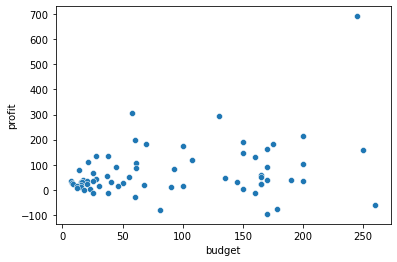

In [32]:
sns.scatterplot(data=df, x="budget", y="profit")

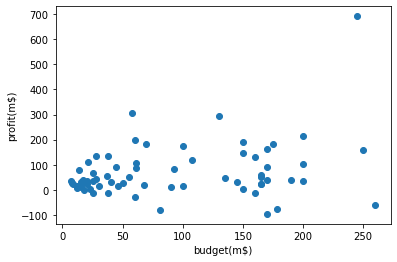

In [33]:
import matplotlib.pyplot as plt
plt.scatter(df['budget'],df['profit'])
plt.xlabel("budget(m$)")
plt.ylabel("profit(m$)")
plt.show()

The dataset contains the 100 best performing movies from the year 2010 to 2016. However scatter plot tells a different story. You can notice that there are some movies with negative profit. Although good movies do incur losses, but there appear to be quite a few movie with losses. What can be the reason behind this? Lets have a closer look at this by finding the movies with negative profit.

In [34]:
#Find the movies with negative profit

neg_prof = df[df['profit']<0]
neg_prof

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
56,Rush,2013,38.0,26.903709,Chris Hemsworth,Olivia Wilde,Alexandra Maria Lara,26000,10000.0,471.0,...,7.9,7.8,7.8,7.8,7.1,7.9,8.1,R,UK,-11.096291
66,Warrior,2011,25.0,13.651662,Tom Hardy,Frank Grillo,Kevin Dunn,27000,798.0,581.0,...,8.0,7.7,7.7,7.5,7.1,8.2,8.1,PG-13,USA,-11.348338
28,X-Men: First Class,2011,160.0,146.405371,Jennifer Lawrence,Michael Fassbender,Oliver Platt,34000,13000.0,1000.0,...,7.8,7.6,7.5,7.7,7.3,7.8,7.7,PG-13,USA,-13.594629
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848
22,Hugo,2011,170.0,73.820094,ChloÃ« Grace Moretz,Christopher Lee,Ray Winstone,17000,16000.0,1000.0,...,7.4,7.5,7.5,7.6,7.4,7.7,7.5,PG,USA,-96.179906


**`Checkpoint 1:`** Can you spot the movie `Tangled` in the dataset? You may be aware of the movie 'Tangled'. Although its one of the highest grossing movies of all time, it has negative profit as per this result. If you cross check the gross values of this movie (link: https://www.imdb.com/title/tt0398286/), you can see that the gross in the dataset accounts only for the domestic gross and not the worldwide gross. This is true for may other movies also in the list.

- ### Subtask 4.1: The General Audience and the Critics

You might have noticed the column `MetaCritic` in this dataset. This is a very popular website where an average score is determined through the scores given by the top-rated critics. Second, you also have another column `IMDb_rating` which tells you the IMDb rating of a movie. This rating is determined by taking the average of hundred-thousands of ratings from the general audience. 

As a part of this subtask, you are required to find out the highest rated movies which have been liked by critics and audiences alike.
1. Firstly you will notice that the `MetaCritic` score is on a scale of `100` whereas the `IMDb_rating` is on a scale of 10. First convert the `MetaCritic` column to a scale of 10.


In [35]:
df.columns.unique()

Index(['Title', 'title_year', 'budget', 'Gross', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'actor_1_facebook_likes',
       'actor_2_facebook_likes', 'actor_3_facebook_likes', 'IMDb_rating',
       'genre_1', 'genre_2', 'genre_3', 'MetaCritic', 'Runtime', 'CVotes10',
       'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04',
       'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale',
       'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M',
       'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A',
       'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS',
       'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829',
       'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F',
       'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS',
       'VotesnUS', 'content_rating', 'Country', 'profit'],
      dtype='object')

In [36]:
# Change the scale of MetaCritic

df['MetaCritic'] = df['MetaCritic']/10
df

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.2,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,8.0,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.7,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.9,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848


2. Now, to find out the movies which have been liked by both critics and audiences alike and also have a high rating overall, you need to -
    - Create a new column `Avg_rating` which will have the average of the `MetaCritic` and `Rating` columns
    - Retain only the movies in which the absolute difference(using abs() function) between the `IMDb_rating` and `Metacritic` columns is less than 0.5. Refer to this link to know how abs() funtion works - https://www.geeksforgeeks.org/abs-in-python/ .
    - Sort these values in a descending order of `Avg_rating` and retain only the movies with a rating equal to higher than `8` and store these movies in a new dataframe `UniversalAcclaim`.

In [37]:
df['Avg_rating']= (df['MetaCritic'] + df['IMDb_rating'])/2
df

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,7.60
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197,8.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,Scott Pilgrim vs. the World,2010,60.0,31.494270,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,...,7.1,7.1,7.0,6.6,7.8,7.4,PG-13,USA,-28.505730,7.20
7,Tangled,2010,260.0,200.807262,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,...,7.7,7.6,7.9,6.9,7.9,7.7,PG,USA,-59.192738,7.45
17,Edge of Tomorrow,2014,178.0,100.189501,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,...,7.8,7.8,7.8,7.5,8.0,7.8,PG-13,USA,-77.810499,7.50
39,The Little Prince,2015,81.2,1.339152,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,...,7.5,7.4,7.9,6.6,7.7,7.7,PG,France,-79.860848,7.40


In [38]:
abs_diff = df[abs(df['MetaCritic'] - df ['IMDb_rating'])< 0.55]


In [39]:
abs_diff.sort_values("Avg_rating", ascending = False)
abs_diff

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,7.60
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197,8.05
1,Zootopia,2016,150.0,341.268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,...,7.8,7.8,8.1,7.6,8.0,8.0,PG,USA,191.268248,7.95
41,Despicable Me,2010,69.0,251.501645,Steve Carell,Miranda Cosgrove,Jack McBrayer,7000,2000.0,975.0,...,7.6,7.5,7.9,7.0,7.6,7.6,PG,USA,182.501645,7.45
19,Guardians of the Galaxy,2014,170.0,333.130696,Bradley Cooper,Vin Diesel,Djimon Hounsou,14000,14000.0,3000.0,...,7.9,7.9,8.0,7.6,8.3,7.9,PG-13,USA,163.130696,7.85
9,Captain America: Civil War,2016,250.0,407.197282,Robert Downey Jr.,Scarlett Johansson,Chris Evans,21000,19000.0,11000.0,...,7.6,7.6,7.9,7.5,8.1,7.7,PG-13,USA,157.197282,7.70
55,True Grit,2010,38.0,171.031347,Matt Damon,Jeff Bridges,Bruce Green,13000,12000.0,538.0,...,7.7,7.7,7.7,7.3,7.9,7.6,PG-13,USA,133.031347,7.80
33,The Martian,2015,108.0,228.430993,Matt Damon,Donald Glover,Benedict Wong,13000,801.0,372.0,...,8.0,7.9,8.2,7.8,8.1,7.9,PG-13,USA,120.430993,8.00
68,Silver Linings Playbook,2012,21.0,132.088910,Jennifer Lawrence,Robert De Niro,Bradley Cooper,34000,22000.0,14000.0,...,7.6,7.6,7.7,6.9,8.0,7.6,R,USA,111.088910,7.95


#### Sort these values in a descending order of Avg_rating and retain only the movies with a rating equal to higher than 8 and store these movies in a new dataframe UniversalAcclaim.

In [40]:
UniversalAcclaim = abs_diff[abs_diff['Avg_rating']>8]
UniversalAcclaim

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197,8.05
48,Captain Phillips,2013,55.0,107.100855,Tom Hanks,Chris Mulkey,Michael Chernus,15000,535.0,186.0,...,7.7,7.7,8.0,7.4,7.8,7.8,PG-13,USA,52.100855,8.05


**`Checkpoint 5:`** Can you spot a `Star Wars` movie in your final dataset?

In [41]:
df[df['Title']=='Star Wars: Episode VII - The Force Awakens']


,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.1


##### Subtask 5.1: Find the Most Popular Trios - I

You're a producer looking to make a blockbuster movie. There will primarily be three lead roles in your movie and you wish to cast the most popular actors for it. Now, since you don't want to take a risk, you will cast a trio which has already acted in together in a movie before. The metric that you've chosen to check the popularity is the Facebook likes of each of these actors.

The dataframe has three columns to help you out for the same, viz. `actor_1_facebook_likes`, `actor_2_facebook_likes`, and `actor_3_facebook_likes`. Your objective is to find the trios which has the most number of Facebook likes combined. That is, the sum of `actor_1_facebook_likes`, `actor_2_facebook_likes` and `actor_3_facebook_likes` should be maximum.
Find out the top 5 popular trios, and output their names in a list.


In [42]:
# Write your code here
team  = df[['actor_1_name', 'actor_2_name' , 'actor_3_name' , 'actor_1_facebook_likes' , 'actor_2_facebook_likes' , 'actor_3_facebook_likes' ]]
team

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes
97,Doug Walker,Rob Walker,0,131,12.0,0.0
47,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0
32,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0
12,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0
45,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0
...,...,...,...,...,...,...
46,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0
7,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0
17,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0
39,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0


In [43]:
team['pop_trio'] = team ['actor_1_facebook_likes']+team ['actor_2_facebook_likes']+team ['actor_3_facebook_likes']
team

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,pop_trio
97,Doug Walker,Rob Walker,0,131,12.0,0.0,143.0
47,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,17166.0
32,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,48523.0
12,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,16721.0
45,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,21000.0
...,...,...,...,...,...,...,...
46,Anna Kendrick,Kieran Culkin,Ellen Wong,10000,1000.0,719.0,11719.0
7,Brad Garrett,Donna Murphy,M.C. Gainey,799,553.0,284.0,1636.0
17,Tom Cruise,Lara Pulver,Noah Taylor,10000,854.0,509.0,11363.0
39,Jeff Bridges,James Franco,Mackenzie Foy,12000,11000.0,6000.0,29000.0


In [44]:
team.sort_values(by = 'pop_trio',ascending = False).head(5)

,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,pop_trio
27,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,29000,27000.0,23000.0,79000.0
14,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,34000,22000.0,20000.0,76000.0
68,Jennifer Lawrence,Robert De Niro,Bradley Cooper,34000,22000.0,14000.0,70000.0
1,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,57800.0
62,Ryan Gosling,Christian Bale,Charlie Talbert,33000,23000.0,767.0,56767.0


In [45]:
top5 = team.sort_values(by = 'pop_trio',ascending = False).head(5)
top5[['actor_1_name', 'actor_2_name' , 'actor_3_name']].values.tolist()

[['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt'],
 ['Jennifer Lawrence', 'Peter Dinklage', 'Hugh Jackman'],
 ['Jennifer Lawrence', 'Robert De Niro', 'Bradley Cooper'],
 ['Ginnifer Goodwin', 'Jason Bateman', 'Idris Elba'],
 ['Ryan Gosling', 'Christian Bale', 'Charlie Talbert']]

- ### Subtask 5.2: Runtime Analysis

There is a column named `Runtime` in the dataframe which primarily shows the length of the movie. It might be intersting to see how this variable this distributed. Plot a `histogram` or `distplot` of seaborn to find the `Runtime` range most of the movies fall into.

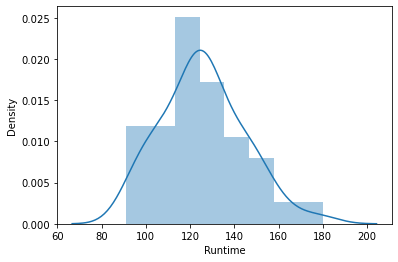

In [46]:
# Runtime histogram/density plot
sns.distplot(df.Runtime, hist = True )
plt.show()

**`Checkpoint 3:`** Most of the movies appear to be sharply 2 hour-long.

- ### Subtask 5.3: R-Rated Movies

Although R rated movies are restricted movies for the under 18 age group, still there are vote counts from that age group. Among all the R rated movies that have been voted by the under-18 age group, find the top 10 movies that have the highest number of votes i.e.`CVotesU18` from the `movies` dataframe. Store these in a dataframe named `PopularR`.

In [47]:
# Write your code here

r_movies = df[df['content_rating']=='R']
PopularR = r_movies.sort_values(by = 'CVotesU18', ascending = False).head(10)
PopularR

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25
36,The Wolf of Wall Street,2013,100.0,116.866727,Leonardo DiCaprio,Matthew McConaughey,Jon Favreau,29000,11000.0,4000.0,...,7.6,7.6,7.5,7.8,8.1,8.1,R,USA,16.866727,7.85
29,Mad Max: Fury Road,2015,150.0,153.629485,Tom Hardy,Charlize Theron,ZoÃ« Kravitz,27000,9000.0,943.0,...,7.5,7.5,7.2,8.0,8.2,8.0,R,Australia,3.629485,8.55
31,The Revenant,2015,135.0,183.635922,Leonardo DiCaprio,Tom Hardy,Lukas Haas,29000,27000.0,733.0,...,7.8,7.8,7.8,7.6,8.1,7.9,R,USA,48.635922,7.80
43,Gone Girl,2014,61.0,167.735396,Patrick Fugit,Sela Ward,Emily Ratajkowski,835,812.0,625.0,...,7.7,7.7,7.7,7.6,8.1,8.1,R,USA,106.735396,8.00
65,The Grand Budapest Hotel,2014,25.0,59.073773,Bill Murray,Tom Wilkinson,F. Murray Abraham,13000,1000.0,670.0,...,7.8,7.8,7.9,7.7,8.1,8.0,R,USA,34.073773,8.45
69,12 Years a Slave,2013,20.0,56.667870,QuvenzhanÃ© Wallis,Scoot McNairy,Taran Killam,2000,660.0,500.0,...,7.8,7.8,8.1,7.7,8.3,8.0,R,USA,36.667870,8.85
68,Silver Linings Playbook,2012,21.0,132.088910,Jennifer Lawrence,Robert De Niro,Bradley Cooper,34000,22000.0,14000.0,...,7.6,7.6,7.7,6.9,8.0,7.6,R,USA,111.088910,7.95
50,Prisoners,2013,46.0,60.962878,Hugh Jackman,Jake Gyllenhaal,Dylan Minnette,20000,15000.0,1000.0,...,7.7,7.7,7.8,7.6,8.1,8.0,R,USA,14.962878,7.75
90,Nightcrawler,2014,8.5,32.279955,Jake Gyllenhaal,Michael Papajohn,James Huang,15000,241.0,85.0,...,7.7,7.7,7.7,7.8,8.0,7.8,R,USA,23.779955,7.75


**`Checkpoint 4:`** Are these kids watching `Deadpool` a lot?

## Task 6 : Demographic analysis

If you take a look at the last columns in the dataframe, most of these are related to demographics of the voters (in the last subtask, i.e., 2.8, you made use one of these columns - CVotesU18). We also have three genre columns indicating the genres of a particular movie. We will extensively use these columns for the third and the final stage of our assignment wherein we will analyse the voters across all demographics and also see how these vary across various genres. So without further ado, let's get started with `demographic analysis`.

-  ###  Subtask 6.1 Combine the Dataframe by Genres

There are 3 columns in the dataframe - `genre_1`, `genre_2`, and `genre_3`. As a part of this subtask, you need to aggregate a few values over these 3 columns. 
1. First create a new dataframe `df_by_genre` that contains `genre_1`, `genre_2`, and `genre_3` and all the columns related to **CVotes/Votes** from the `movies` data frame. There are 47 columns to be extracted in total.
2. Now, Add a column called `cnt` to the dataframe `df_by_genre` and initialize it to one. You will realise the use of this column by the end of this subtask.
3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.
4. Perform the same operation for `genre_2` and `genre_3` and store it dataframes `df_by_g2` and `df_by_g3` respectively. 
5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html
6. The column `cnt` on aggregation has basically kept the track of the number of occurences of each genre.Subset the genres that have atleast 10 movies into a new dataframe `genre_top10` based on the `cnt` column value.
7. Now, take the mean of all the numeric columns by dividing them with the column value `cnt` and store it back to the same dataframe. We will be using this dataframe for further analysis in this task unless it is explicitly mentioned to use the dataframe `movies`.
8. Since the number of votes can't be a fraction, type cast all the CVotes related columns to integers. Also, round off all the Votes related columns upto two digits after the decimal point.


In [48]:
# Create the dataframe df_by_genre

df_by_genre =df[['genre_1', 'genre_2', 'genre_3','CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04','CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF', 'Votes1000', 'VotesUS', 'VotesnUS']]
df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS
97,Action,Adventure,Fantasy,155391,161810,166378,99402,40734,18060,8751,...,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9
47,Action,Adventure,Comedy,147467,147966,170810,105717,41811,15510,7046,...,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9
32,Action,Adventure,Mystery,85219,83874,150153,121748,50575,18571,7591,...,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4
12,Animation,Adventure,Comedy,139773,149992,158704,88289,31291,11850,4859,...,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3
45,Animation,Action,Adventure,41269,50795,83773,55181,21793,8596,3680,...,7.7,7.6,7.6,7.5,7.4,7.4,7.4,7.2,8.0,7.6


In [70]:
# Create a column cnt and initialize it to 1

df_by_genre['cnt'] = 1
df_by_genre.head()

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
27,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,...,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8,1
13,Action,Adventure,Thriller,69286,105160,178610,119630,45168,16321,6682,...,7.6,7.6,7.6,7.7,7.7,7.9,7.4,8.0,7.6,1
28,Action,Adventure,Sci-Fi,64428,96219,200144,129352,41945,12861,4799,...,7.7,7.6,7.8,7.6,7.5,7.7,7.3,7.8,7.7,1
19,Action,Adventure,Sci-Fi,156606,185326,216876,127878,49009,18501,8326,...,7.9,7.9,8.0,7.9,7.9,8.0,7.6,8.3,7.9,1
34,Drama,Sci-Fi,Thriller,89986,127616,169693,122275,57564,25393,12286,...,7.8,7.8,7.5,7.7,7.7,7.5,7.5,7.9,7.8,1


#### 3. First group the dataframe `df_by_genre` by `genre_1` and find the sum of all the numeric columns such as `cnt`, columns related to CVotes and Votes columns and store it in a dataframe `df_by_g1`.

In [71]:
# Group the movies by individual genres

df_by_g1=df_by_genre.groupby('genre_1').sum()
df_by_g2=df_by_genre.groupby('genre_2').sum()
df_by_g3=df_by_genre.groupby('genre_2').sum()

#### 5. Now that you have 3 dataframes performed by grouping over `genre_1`, `genre_2`, and `genre_3` separately, it's time to combine them. For this, add the three dataframes and store it in a new dataframe `df_add`, so that the corresponding values of Votes/CVotes get added for each genre.There is a function called `add()` in pandas which lets you do this. You can refer to this link to see how this function works. https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.add.html

In [72]:
# Add the grouped data frames and store it in a new data frame

df_add = pd.concat([df_by_g1,df_by_g2,df_by_g3], axis=0)
print(df_add)

           CVotes10  CVotes09  CVotes08  CVotes07  CVotes06  CVotes05  \
Action      2158013   2523154   3387402   2123635    774170    282027   
Adventure    825165    945907   1216240    747981    274453    102038   
Animation    681562    798227   1153214    722782    251076     83069   
Biography    469377    745217   1088633    630095    199006     65603   
Comedy       170281    257200    448000    303185    114274     42619   
Crime        308869    593223    953282    544940    168199     54139   
Drama        250889    368895    558037    381775    155520     62541   
Action       238060    285510    430062    260106     88580     29250   
Adventure   2258868   2497399   3168981   1972278    725579    261991   
Biography    154316    279822    507566    315808     98576     31438   
Comedy       369255    546944    711139    409363    152499     60557   
Crime         19576     40247     85359     64633     24920      8548   
Drama       1467253   2101139   3138170   1897188  

In [75]:
t = df_by_g1.add(df_by_g2 , fill_value = 0)
aggregate_add = t.add(df_by_g3 , fill_value = 0)
aggregate_add.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,2634133.0,3094174.0,4247526.0,2643847.0,951330.0,340527.0,142114.0,80274.0,55335.0,141650.0,...,232.2,231.5,234.5,229.1,228.5,232.8,219.0,239.5,233.0,30.0
Adventure,5342901.0,5940705.0,7554202.0,4692537.0,1725611.0,626020.0,263690.0,150605.0,103088.0,264839.0,...,404.5,403.2,410.1,400.0,398.4,407.9,385.1,417.3,406.3,52.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,778009.0,1304861.0,2103765.0,1261711.0,396158.0,128479.0,49888.0,27820.0,18789.0,48224.0,...,123.9,123.7,123.7,122.3,122.1,124.7,115.5,126.5,124.6,16.0
Comedy,908791.0,1351088.0,1870278.0,1121911.0,419272.0,163733.0,72706.0,42958.0,30040.0,61014.0,...,123.1,123.4,122.5,121.2,121.2,122.5,115.9,127.1,123.9,16.0


In [76]:
# Extract genres with atleast 10 occurences

genre_top10 = aggregate_add[aggregate_add['cnt']>10]
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,2634133.0,3094174.0,4247526.0,2643847.0,951330.0,340527.0,142114.0,80274.0,55335.0,141650.0,...,232.2,231.5,234.5,229.1,228.5,232.8,219.0,239.5,233.0,30.0
Adventure,5342901.0,5940705.0,7554202.0,4692537.0,1725611.0,626020.0,263690.0,150605.0,103088.0,264839.0,...,404.5,403.2,410.1,400.0,398.4,407.9,385.1,417.3,406.3,52.0
Animation,681562.0,798227.0,1153214.0,722782.0,251076.0,83069.0,30718.0,15733.0,10026.0,25193.0,...,85.4,84.9,87.8,84.5,84.1,86.7,80.0,87.6,86.1,11.0
Biography,778009.0,1304861.0,2103765.0,1261711.0,396158.0,128479.0,49888.0,27820.0,18789.0,48224.0,...,123.9,123.7,123.7,122.3,122.1,124.7,115.5,126.5,124.6,16.0
Comedy,908791.0,1351088.0,1870278.0,1121911.0,419272.0,163733.0,72706.0,42958.0,30040.0,61014.0,...,123.1,123.4,122.5,121.2,121.2,122.5,115.9,127.1,123.9,16.0
Drama,3185395.0,4571173.0,6834377.0,4176151.0,1415384.0,489843.0,199315.0,110897.0,75391.0,168378.0,...,424.0,424.3,423.0,420.8,419.8,426.1,400.1,436.6,427.4,55.0


In [77]:
# Take the mean for every column by dividing with cnt 
genre_top10.iloc[ :, 0:-1 ] = genre_top10.iloc[ :, 0:-1 ].divide(genre_top10['cnt'], axis = 0)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,87804.433333,103139.133333,141584.200000,88128.233333,31711.000000,11350.900000,4737.133333,2675.800000,1844.500000,4721.666667,...,7.740000,7.716667,7.816667,7.636667,7.616667,7.760000,7.300000,7.983333,7.766667,30.0
Adventure,102748.096154,114244.326923,145273.115385,90241.096154,33184.826923,12038.846154,5070.961538,2896.250000,1982.461538,5093.057692,...,7.778846,7.753846,7.886538,7.692308,7.661538,7.844231,7.405769,8.025000,7.813462,52.0
Animation,61960.181818,72566.090909,104837.636364,65707.454545,22825.090909,7551.727273,2792.545455,1430.272727,911.454545,2290.272727,...,7.763636,7.718182,7.981818,7.681818,7.645455,7.881818,7.272727,7.963636,7.827273,11.0
Biography,48625.562500,81553.812500,131485.312500,78856.937500,24759.875000,8029.937500,3118.000000,1738.750000,1174.312500,3014.000000,...,7.743750,7.731250,7.731250,7.643750,7.631250,7.793750,7.218750,7.906250,7.787500,16.0
Comedy,56799.437500,84443.000000,116892.375000,70119.437500,26204.500000,10233.312500,4544.125000,2684.875000,1877.500000,3813.375000,...,7.693750,7.712500,7.656250,7.575000,7.575000,7.656250,7.243750,7.943750,7.743750,16.0
Drama,57916.272727,83112.236364,124261.400000,75930.018182,25734.254545,8906.236364,3623.909091,2016.309091,1370.745455,3061.418182,...,7.709091,7.714545,7.690909,7.650909,7.632727,7.747273,7.274545,7.938182,7.770909,55.0


In [78]:
# Rounding off the columns of Votes to two decimals

genre_top10.iloc[ :, 0:-1 ] = genre_top10.iloc[ :, 0:-1 ].divide(genre_top10['cnt'], axis = 0).round(2)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,2926.81,3437.97,4719.47,2937.61,1057.03,378.36,157.90,89.19,61.48,157.39,...,0.26,0.26,0.26,0.25,0.25,0.26,0.24,0.27,0.26,30.0
Adventure,1975.92,2197.01,2793.71,1735.41,638.17,231.52,97.52,55.70,38.12,97.94,...,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.15,0.15,52.0
Animation,5632.74,6596.92,9530.69,5973.40,2075.01,686.52,253.87,130.02,82.86,208.21,...,0.71,0.70,0.73,0.70,0.70,0.72,0.66,0.72,0.71,11.0
Biography,3039.10,5097.11,8217.83,4928.56,1547.49,501.87,194.88,108.67,73.39,188.38,...,0.48,0.48,0.48,0.48,0.48,0.49,0.45,0.49,0.49,16.0
Comedy,3549.96,5277.69,7305.77,4382.46,1637.78,639.58,284.01,167.80,117.34,238.34,...,0.48,0.48,0.48,0.47,0.47,0.48,0.45,0.50,0.48,16.0
Drama,1053.02,1511.13,2259.30,1380.55,467.90,161.93,65.89,36.66,24.92,55.66,...,0.14,0.14,0.14,0.14,0.14,0.14,0.13,0.14,0.14,55.0


In [79]:
# Converting CVotes to int type

genre_top10.loc[:,"CVotes10":"CVotesnUS"] = genre_top10.loc[:,"CVotes10":"CVotesnUS"].astype(int)
genre_top10

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,2926.0,3437.0,4719.0,2937.0,1057.0,378.0,157.0,89.0,61.0,157.0,...,0.26,0.26,0.26,0.25,0.25,0.26,0.24,0.27,0.26,30.0
Adventure,1975.0,2197.0,2793.0,1735.0,638.0,231.0,97.0,55.0,38.0,97.0,...,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.15,0.15,52.0
Animation,5632.0,6596.0,9530.0,5973.0,2075.0,686.0,253.0,130.0,82.0,208.0,...,0.71,0.70,0.73,0.70,0.70,0.72,0.66,0.72,0.71,11.0
Biography,3039.0,5097.0,8217.0,4928.0,1547.0,501.0,194.0,108.0,73.0,188.0,...,0.48,0.48,0.48,0.48,0.48,0.49,0.45,0.49,0.49,16.0
Comedy,3549.0,5277.0,7305.0,4382.0,1637.0,639.0,284.0,167.0,117.0,238.0,...,0.48,0.48,0.48,0.47,0.47,0.48,0.45,0.50,0.48,16.0
Drama,1053.0,1511.0,2259.0,1380.0,467.0,161.0,65.0,36.0,24.0,55.0,...,0.14,0.14,0.14,0.14,0.14,0.14,0.13,0.14,0.14,55.0


If you take a look at the final dataframe that you have gotten, you will see that you now have the complete information about all the demographic (Votes- and CVotes-related) columns across the top 10 genres. We can use this dataset to extract exciting insights about the voters!

-  ###  Task 7: Genre Counts!

Now let's derive some insights from this data frame. Make a bar chart plotting different genres vs cnt using seaborn.

In [80]:
genre_top10.columns.unique()

Index(['CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05',
       'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale',
       'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829',
       'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'Votes1000', 'VotesUS', 'VotesnUS', 'cnt'],
      dtype='object')

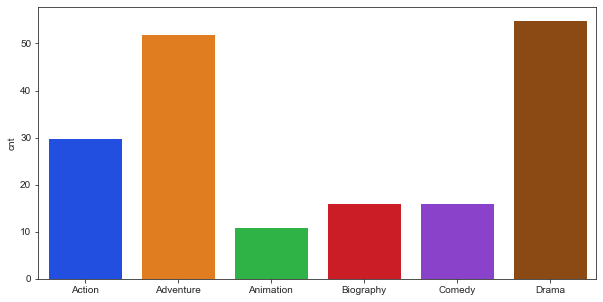

In [81]:
# Countplot for genres

sns.set_style("ticks")
bar,ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(y="cnt", x=genre_top10.index, data=genre_top10, ci=None,palette="bright",orient='v', )

**`Checkpoint 5:`** Is the bar for `Drama` the tallest?

-  ###  Subtask 7.1: Gender and Genre

If you have closely looked at the Votes- and CVotes-related columns, you might have noticed the suffixes `F` and `M` indicating Female and Male. Since we have the vote counts for both males and females, across various age groups, let's now see how the popularity of genres vary between the two genders in the dataframe. 

1. Make the first heatmap to see how the average number of votes of males is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for males, i.e., `CVotesU18M`,`CVotes1829M`, `CVotes3044M`, and `CVotes45AM`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-male group. 

2. Make the second heatmap to see how the average number of votes of females is varying across the genres. Use seaborn heatmap for this analysis. The X-axis should contain the four age-groups for females, i.e., `CVotesU18F`,`CVotes1829F`, `CVotes3044F`, and `CVotes45AF`. The Y-axis will have the genres and the annotation in the heatmap tell the average number of votes for that age-female group. 

3. Make sure that you plot these heatmaps side by side using `subplots` so that you can easily compare the two genders and derive insights.

4. Write your any three inferences from this plot. You can make use of the previous bar plot also here for better insights.
Refer to this link- https://seaborn.pydata.org/generated/seaborn.heatmap.html. You might have to plot something similar to the fifth chart in this page (You have to plot two such heatmaps side by side).

5. Repeat subtasks 1 to 4, but now instead of taking the CVotes-related columns, you need to do the same process for the Votes-related columns. These heatmaps will show you how the two genders have rated movies across various genres.

You might need the below link for formatting your heatmap.
https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot

-  Note : Use `genre_top10` dataframe for this subtask

In [82]:
genre_top10.columns.unique()

Index(['CVotes10', 'CVotes09', 'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05',
       'CVotes04', 'CVotes03', 'CVotes02', 'CVotes01', 'CVotesMale',
       'CVotesFemale', 'CVotesU18', 'CVotesU18M', 'CVotesU18F', 'CVotes1829',
       'CVotes1829M', 'CVotes1829F', 'CVotes3044', 'CVotes3044M',
       'CVotes3044F', 'CVotes45A', 'CVotes45AM', 'CVotes45AF', 'CVotes1000',
       'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF', 'VotesU18', 'VotesU18M',
       'VotesU18F', 'Votes1829', 'Votes1829M', 'Votes1829F', 'Votes3044',
       'Votes3044M', 'Votes3044F', 'Votes45A', 'Votes45AM', 'Votes45AF',
       'Votes1000', 'VotesUS', 'VotesnUS', 'cnt'],
      dtype='object')

In [83]:
genre_top10.head()

,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
Action,2926.0,3437.0,4719.0,2937.0,1057.0,378.0,157.0,89.0,61.0,157.0,...,0.26,0.26,0.26,0.25,0.25,0.26,0.24,0.27,0.26,30.0
Adventure,1975.0,2197.0,2793.0,1735.0,638.0,231.0,97.0,55.0,38.0,97.0,...,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.15,0.15,52.0
Animation,5632.0,6596.0,9530.0,5973.0,2075.0,686.0,253.0,130.0,82.0,208.0,...,0.71,0.70,0.73,0.70,0.70,0.72,0.66,0.72,0.71,11.0
Biography,3039.0,5097.0,8217.0,4928.0,1547.0,501.0,194.0,108.0,73.0,188.0,...,0.48,0.48,0.48,0.48,0.48,0.49,0.45,0.49,0.49,16.0
Comedy,3549.0,5277.0,7305.0,4382.0,1637.0,639.0,284.0,167.0,117.0,238.0,...,0.48,0.48,0.48,0.47,0.47,0.48,0.45,0.50,0.48,16.0


Text(0.5, 1.0, 'plot-1')

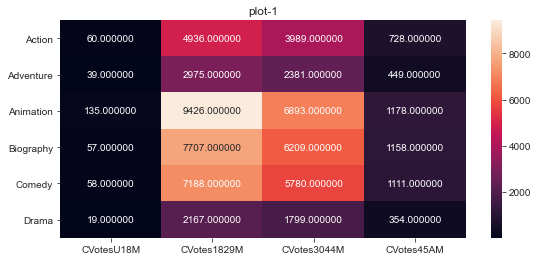

In [84]:
# 1st set of heat maps for CVotes-related columns

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.heatmap(genre_top10[['CVotesU18M','CVotes1829M','CVotes3044M', 'CVotes45AM']],annot=True, fmt='f')
plt.title("plot-1")


**`Inferences:`** A few inferences that can be seen from the heatmap above is that males have voted more than females, and Sci-Fi appears to be most popular among the 18-29 age group irrespective of their gender. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1: People under 18-29 likes the animation movies
- Inference 2: People under 30-44 likes the animation movies
- Inference 3: People under 18-29 likes the biography movies

Text(0.5, 1.0, 'plot-1')

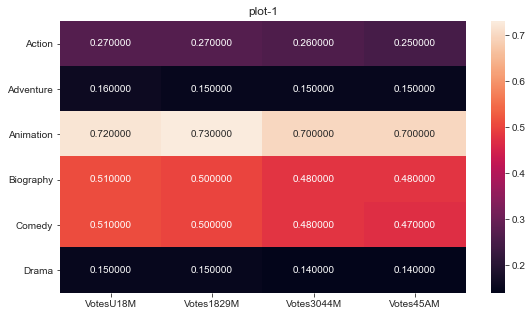

In [85]:
# 2nd set of heat maps for Votes-related columns

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.heatmap(genre_top10[['VotesU18M','Votes1829M','Votes3044M', 'Votes45AM']],annot=True, fmt='f')
plt.title("plot-1")

**`Inferences:`** Sci-Fi appears to be the highest rated genre in the age group of U18 for both males and females. Also, females in this age group have rated it a bit higher than the males in the same age group. What more can you infer from the two heatmaps that you have plotted? Write your three inferences/observations below:
- Inference 1:
- Inference 2:
- Inference 3:

-  ###  Subtask 7.2: US vs non-US Cross Analysis

The dataset contains both the US and non-US movies. Let's analyse how both the US and the non-US voters have responded to the US and the non-US movies.

1. Create a column `IFUS` in the dataframe `movies`. The column `IFUS` should contain the value "USA" if the `Country` of the movie is "USA". For all other countries other than the USA, `IFUS` should contain the value `non-USA`.


2. Now make a boxplot that shows how the number of votes from the US people i.e. `CVotesUS` is varying for the US and non-US movies. Make use of the column `IFUS` to make this plot. Similarly, make another subplot that shows how non US voters have voted for the US and non-US movies by plotting `CVotesnUS` for both the US and non-US movies. Write any of your two inferences/observations from these plots.


3. Again do a similar analysis but with the ratings. Make a boxplot that shows how the ratings from the US people i.e. `VotesUS` is varying for the US and non-US movies. Similarly, make another subplot that shows how `VotesnUS` is varying for the US and non-US movies. Write any of your two inferences/observations from these plots.

Note : Use `movies` dataframe for this subtask. Make use of this documention to format your boxplot - https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [86]:
# Creating IFUS column

df['IFUS'] =df['Country'].apply(lambda x:'USA' if x == 'USA' else 'non-usa')
df.head()

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,profit,Avg_rating,IFUS
97,Star Wars: Episode VII - The Force Awakens,2015,245.0,936.662225,Doug Walker,Rob Walker,0,131,12.0,0.0,...,7.8,8.2,7.7,8.2,7.9,PG-13,USA,691.662225,8.10,USA
47,Deadpool,2016,58.0,363.024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,...,7.8,7.9,7.3,8.1,7.9,R,USA,305.024263,7.25,USA
32,The Hunger Games: Catching Fire,2013,130.0,424.645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,...,7.2,7.9,6.7,7.7,7.4,PG-13,USA,294.645577,7.60,USA
12,Toy Story 3,2010,200.0,414.984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,...,8.1,8.1,8.1,8.5,8.3,G,USA,214.984497,8.75,USA
45,The Lego Movie,2014,60.0,257.756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,...,7.4,7.4,7.2,8.0,7.6,PG,Australia,197.756197,8.05,non-usa


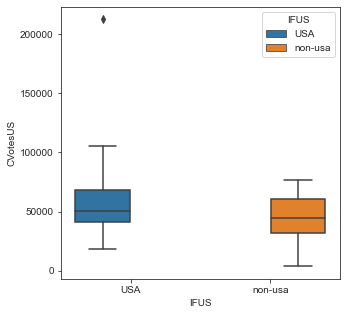

In [87]:
# Box plot - 1: CVotesUS(y) vs IFUS(x)

fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(y = 'CVotesUS',x ='IFUS',data=df,hue="IFUS");


**`Inferences:`** Write your two inferences/observations below:
- Inference 1: The USA movies are getting more ratings by US people
- Inference 2:The NON-USA movies are not getting more ratings by US people

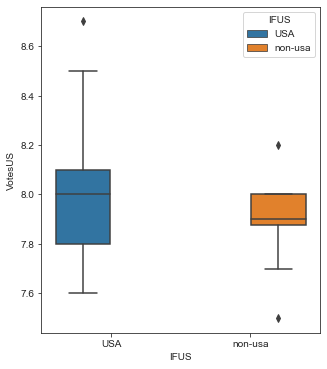

In [88]:
# Box plot - 2: VotesUS(y) vs IFUS(x)

fig, ax = plt.subplots(figsize=(5,6))
sns.boxplot(y = 'VotesUS',x ='IFUS',data=df,hue="IFUS");

**`Inferences:`** Write your two inferences/observations below:
- Inference 1: USA movies are more liked by USA people
- Inference 2: Non USA movies are less likey 

-  ###  Subtask 7.3:  Top 1000 Voters Vs Genres

You might have also observed the column `CVotes1000`. This column represents the top 1000 voters on IMDb and gives the count for the number of these voters who have voted for a particular movie. Let's see how these top 1000 voters have voted across the genres. 

1. Sort the dataframe genre_top10 based on the value of `CVotes1000`in a descending order.

2. Make a seaborn barplot for `genre` vs `CVotes1000`.

3. Write your inferences. You can also try to relate it with the heatmaps you did in the previous subtasks.




In [89]:
# Sorting by CVotes1000


df_by_genre.sort_values(by='CVotes1000', ascending = False , inplace = True)
df_by_genre.head(10)

,genre_1,genre_2,genre_3,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,cnt
27,Action,Adventure,Sci-Fi,584839,485218,304457,130972,46393,20595,10050,...,8.7,8.7,8.5,8.1,8.1,8.0,8.2,8.7,8.8,1
13,Action,Adventure,Thriller,69286,105160,178610,119630,45168,16321,6682,...,7.6,7.6,7.6,7.7,7.7,7.9,7.4,8.0,7.6,1
28,Action,Adventure,Sci-Fi,64428,96219,200144,129352,41945,12861,4799,...,7.7,7.6,7.8,7.6,7.5,7.7,7.3,7.8,7.7,1
19,Action,Adventure,Sci-Fi,156606,185326,216876,127878,49009,18501,8326,...,7.9,7.9,8.0,7.9,7.9,8.0,7.6,8.3,7.9,1
34,Drama,Sci-Fi,Thriller,89986,127616,169693,122275,57564,25393,12286,...,7.8,7.8,7.5,7.7,7.7,7.5,7.5,7.9,7.8,1
12,Animation,Adventure,Comedy,139773,149992,158704,88289,31291,11850,4859,...,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,1
55,Adventure,Drama,Western,21094,40901,91825,67175,23055,7191,2678,...,7.6,7.6,7.5,7.7,7.7,7.7,7.3,7.9,7.6,1
15,Action,Adventure,Sci-Fi,59347,81516,136088,87940,32150,11522,4862,...,7.6,7.6,7.9,7.7,7.7,8.1,7.1,7.9,7.6,1
37,Action,Drama,Sci-Fi,38666,61881,150351,116877,40634,13541,5252,...,7.5,7.5,7.5,7.4,7.4,7.5,7.1,7.6,7.5,1
24,Animation,Action,Adventure,103844,127521,167836,89478,26766,8277,2953,...,8.0,8.0,8.4,7.9,7.9,8.2,7.4,8.1,8.1,1


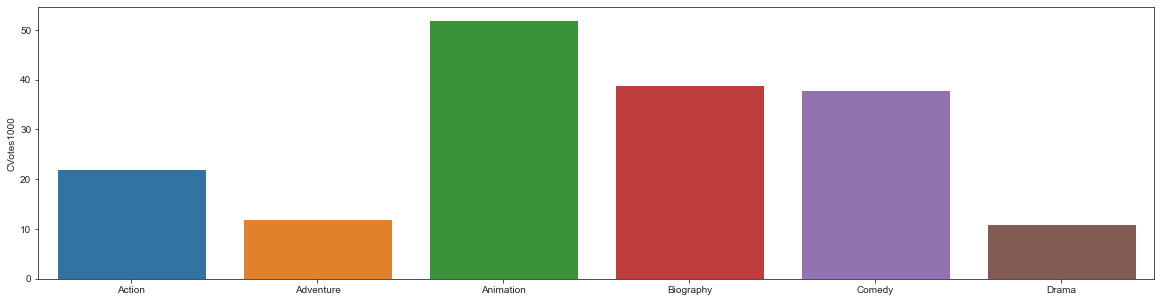

In [91]:
# Bar plot
plt.figure(figsize = (20,5))
sns.barplot(x=genre_top10.index.values, y=genre_top10['CVotes1000']);

**`Inferences:`** Write your inferences/observations here.

**`Checkpoint 6:`** The genre `DRAMA` seems to be most unpopular among the top 1000 voters.

With the above subtask, your assignment is over. In your free time, do explore the dataset further on your own and see what kind of other insights you can get across various other columns.